# Lotka-Volterra simulator: joint ratio variance vs theta distance

In [1]:
import numpy as np
import corner
from matplotlib import pyplot as plt
%matplotlib inline
import logging
import matplotlib

from goldmine.simulators.lotka_volterra import LotkaVolterra

logging.basicConfig(format='%(asctime)s  %(message)s', datefmt='%H:%M')
logging.getLogger().setLevel(logging.INFO)

## Run simulator and collect log r, t

In [2]:
simulator = LotkaVolterra()
theta0 = simulator.theta_defaults(single_theta=True)[0][0]
print(theta0)

[-4.60517019 -0.69314718  0.         -4.60517019]


In [3]:
dmin, dmax = 0.001, 1.
n_thetas = 50
n_samples = 50

In [4]:
dthetas = []
log_r_xz = []
t_xz = []

distances = np.exp(np.log(dmin) + (np.log(dmax) - np.log(dmin)) * np.random.rand(n_thetas))
r_variances = []
r_means = []

for i_theta, distance in enumerate(distances):
    logging.info('Starting simulation for distance %s', distance)
    
    dtheta = np.random.rand(4)
    dtheta *= distance / np.linalg.norm(dtheta)
    theta1 = theta0 + dtheta
    
    x, this_r_xz = simulator.rvs_ratio(theta0, theta1, theta0, n_samples)
    
    logging.info('  Var[r(x,z)] = %s', np.var(this_r_xz, dtype=np.float64))
    logging.info('  E[r(x,z)]   = %s', np.mean(this_r_xz, dtype=np.float64))
    
    r_variances.append(np.var(this_r_xz, dtype=np.float64))
    r_means.append(np.mean(this_r_xz, dtype=np.float64))

r_variances = np.array(r_variances)
r_means = np.array(r_means)


21:03  Starting simulation for distance 0.08039693530044827
21:03    Var[r(x,z)] = 48.15770935225993
21:03    E[r(x,z)]   = 1.5510166478962182
21:03  Starting simulation for distance 0.13483394660771467
21:04  Too many steps in simulation. Total rate: 98368.0
21:04    Var[r(x,z)] = 0.00224592416746765
21:04    E[r(x,z)]   = 0.008782182354476012
21:04  Starting simulation for distance 0.023201861971446375
21:05    Var[r(x,z)] = 0.677652487129324
21:05    E[r(x,z)]   = 0.9517625879644982
21:05  Starting simulation for distance 0.016138213727028453
21:06    Var[r(x,z)] = 0.22159599413878917
21:06    E[r(x,z)]   = 0.8669246490643926
21:06  Starting simulation for distance 0.03342364699445042
21:06    Var[r(x,z)] = 2.3274132655676727
21:06    E[r(x,z)]   = 0.999031877955664
21:06  Starting simulation for distance 0.011337455112570392
21:06  Too many steps in simulation. Total rate: 98274.0
21:07    Var[r(x,z)] = 0.08738936469120821
21:07    E[r(x,z)]   = 0.9839765303423097
21:07  Starting s

## Same with smaller simulation time

In [5]:
simulator2 = LotkaVolterra(duration=10)

In [6]:
# distances2 = np.exp(np.log(dmin) + (np.log(dmax) - np.log(dmin)) * np.random.rand(n_thetas))
r_variances2 = []
r_means2 = []

for i_theta, distance in enumerate(distances):
    logging.info('Starting simulation for distance %s', distance)
    
    dtheta = np.random.rand(4)
    dtheta *= distance / np.linalg.norm(dtheta)
    theta1 = theta0 + dtheta
    
    x, this_r_xz = simulator2.rvs_ratio(theta0, theta1, theta0, n_samples)
    
    logging.info('  Var[r(x,z)] = %s', np.var(this_r_xz, dtype=np.float64))
    logging.info('  E[r(x,z)]   = %s', np.mean(this_r_xz, dtype=np.float64))
    
    r_variances2.append(np.var(this_r_xz, dtype=np.float64))
    r_means2.append(np.mean(this_r_xz, dtype=np.float64))

r_variances2 = np.array(r_variances2)
r_means2 = np.array(r_means2)


21:34  Starting simulation for distance 0.08039693530044827
21:34    Var[r(x,z)] = 35.08217742694724
21:34    E[r(x,z)]   = 1.3008042469885794
21:34  Starting simulation for distance 0.13483394660771467
21:34    Var[r(x,z)] = 1.232243671534159
21:34    E[r(x,z)]   = 0.379638755695656
21:34  Starting simulation for distance 0.023201861971446375
21:34    Var[r(x,z)] = 0.5828465465096506
21:34    E[r(x,z)]   = 1.0019191214946614
21:34  Starting simulation for distance 0.016138213727028453
21:35    Var[r(x,z)] = 0.08698857582832308
21:35    E[r(x,z)]   = 1.0110927376693617
21:35  Starting simulation for distance 0.03342364699445042
21:35    Var[r(x,z)] = 0.5754163237652113
21:35    E[r(x,z)]   = 0.9489771358257012
21:35  Starting simulation for distance 0.011337455112570392
21:35    Var[r(x,z)] = 0.09882714169919772
21:35    E[r(x,z)]   = 1.0082220441681229
21:35  Starting simulation for distance 0.032550475188732025
21:35    Var[r(x,z)] = 0.761635923337764
21:35    E[r(x,z)]   = 1.0033124

## Plot theta distance vs r variance

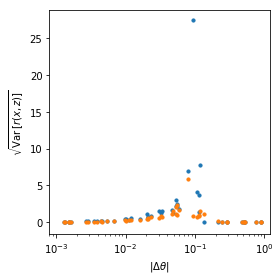

In [7]:
fig = plt.figure(figsize=(4,4))
ax = plt.gca()

sc = plt.scatter(distances, r_variances**0.5, s=10.)
sc = plt.scatter(distances, r_variances2**0.5, s=10.)

plt.xlabel(r'$|\Delta \theta|$')
plt.ylabel(r'$\sqrt{\mathrm{Var}\,[r(x,z)]}$')
plt.xlim(0.0008,1.2)
#plt.ylim(0.,11.)
ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')

plt.tight_layout()
#plt.savefig('lv_local_model_zoom.pdf')
plt.show()

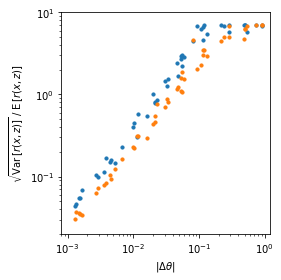

In [8]:
fig = plt.figure(figsize=(4,4))
ax = plt.gca()

sc = plt.scatter(distances, r_variances**0.5 / r_means, s=10.)
sc = plt.scatter(distances, r_variances2**0.5 / r_means2, s=10.)

plt.xlabel(r'$|\Delta \theta|$')
plt.ylabel(r'$\sqrt{\mathrm{Var}\,[r(x,z)]}\;/\;\mathrm{E}\,[r(x,z)]$')
plt.xlim(0.0008,1.2)
plt.ylim(0.02,10.)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

plt.tight_layout()
plt.savefig('lv_joint_ratio_variance.pdf')
plt.show()

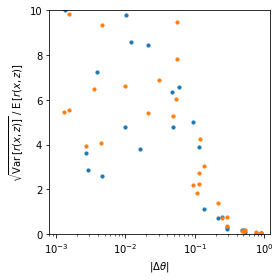

In [12]:
fig = plt.figure(figsize=(4,4))
ax = plt.gca()

sc = plt.scatter(distances, r_variances**0.5 / r_means / np.abs(np.log(r_means)), s=10.)
sc = plt.scatter(distances, r_variances2**0.5 / r_means2 / np.abs(np.log(r_means2)), s=10.)

plt.xlabel(r'$|\Delta \theta|$')
plt.ylabel(r'$\sqrt{\mathrm{Var}\,[r(x,z)]}\;/\;\mathrm{E}\,[r(x,z)]$')
plt.xlim(0.0008,1.2)
plt.ylim(0.,10.)
ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')

plt.tight_layout()
#plt.savefig('lv_joint_ratio_variance.pdf')
plt.show()